In [1]:
#test_3 automate everything

In [2]:
#csv ->
#   Stock_Open  Stock_close  avg_compound

#For weekends ->
#   Stock_Open(last_weekday)  Stock_close(last_weekday)  avg_compound(weekend_values)

In [ ]:
import torch

USE_CUDA = False

mod = torch.nn.Linear(20, 30)
if USE_CUDA:
    mod.cuda()

device = 'cpu'
if USE_CUDA:
    device = 'cuda'
inp = torch.randn(128, 20, device=device)
print(mod(inp).device)

In [2]:
import requests
import pandas as pd
from io import StringIO

class StockData:
    def __init__(self, stock_name):
        self.stock_name = stock_name

    def stock_data(self):
        api_key = "COOFAIV9AV9SVV19"
        url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol={self.stock_name}&apikey={api_key}&datatype=csv'
        r = requests.get(url)
        return r.text

sd = StockData("NVDA")
data1 = sd.stock_data()
df = pd.read_csv(StringIO(data1))

print(df.head())
print(len(df['close']))

    timestamp    open    high     low   close     volume
0  2024-11-20  147.41  147.56  142.73  145.89  274811040
1  2024-11-19  141.32  147.13  140.99  147.01  227834912
2  2024-11-18  139.50  141.55  137.15  140.15  221865993
3  2024-11-15  144.87  145.24  140.08  141.98  250132869
4  2024-11-14  147.64  149.00  145.55  146.76  194463301
6305


In [4]:
df['close']

0       134.80
1       134.81
2       132.65
3       132.89
4       127.72
         ...  
6272     28.25
6273     29.19
6274     27.44
6275     25.00
6276     23.50
Name: close, Length: 6277, dtype: float64

In [5]:
import datetime
from datetime import date, datetime, timedelta

now = date.today()
print(now)

2024-10-14


In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# import requests
# import csv
# from io import StringIO
# import pandas as pd
# from bs4 import BeautifulSoup
# from datetime import datetime, timedelta
# import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# class NewsScraper:
#     analyzer = SentimentIntensityAnalyzer()
#     avg_compound = []
#     epub_date = []

#     def __init__(self, api_key, total_days):
#         self.api_key = api_key
#         self.total_days = total_days
#         self.now = datetime.now()

#     def scrape_news(self):
#         c=0
#         for i in range(self.total_days):
#             avg = 0
#             epub_date_day = []

#             date = (self.now - timedelta(days=i)).strftime('%Y-%m-%d')
#             url = f'https://content.guardianapis.com/search?section=business&page-size=200&from-date={date}&to-date={date}&show-fields=body&api-key={self.api_key}'

#             try:
#                 response = requests.get(url)
#                 data = response.json()
#             except requests.exceptions.RequestException as e:
#                 print(f"Error requesting API: {e}")
#                 continue

#             if 'response' not in data or 'results' not in data.get('response', {}):
#                 print(f"Error: Unexpected response format. Response: {data}")
#                 continue

#             article_content = []
#             for article in data['response']['results']:
#                 content = article.get('fields', {}).get('body', '')
#                 publication_date = article.get('webPublicationDate', '')
#                 date_string = publication_date.split('T')[0]  # extract the date part

#                 # Remove HTML tags using BeautifulSoup
#                 soup = BeautifulSoup(content, 'html.parser')
#                 content = soup.get_text()

#                 article_content.append(content)
#                 epub_date_day.append(date_string)  # append the date string

#             sentiment_list = []
#             for article in article_content:
#                 temp = self.analyzer.polarity_scores(article)
#                 sentiment_list.append(temp)

#             compound_list = []
#             for i in sentiment_list:
#                 temp = i.get('compound')
#                 compound_list.append(temp)

#             if compound_list:
#                 sum = 0
#                 for i in compound_list:
#                     sum = sum + i

#                 avg = sum / (len(compound_list))

#                 self.avg_compound.append(avg)
#                 self.epub_date.append(epub_date_day[0])

#             avg = 0
#             article_content.clear()
#             sentiment_list.clear()
#             compound_list.clear()
#             epub_date_day.clear()

#             c=c+1
#             print(c)

# api_key = '1e78027b-d07c-4e35-9a0a-8f1d2b4e5549'

# start_date = '2023-10-01'
# current_date = str(date.today())

# d1 = datetime.strptime(start_date, "%Y-%m-%d")
# d2 = datetime.strptime(current_date, "%Y-%m-%d")

# total_days = (d2 - d1).days

# ns = NewsScraper(api_key, total_days)
# ns.scrape_news()

# print(ns.avg_compound)
# print(ns.epub_date)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Ensure NLTK's VADER is downloaded
nltk.download("vader_lexicon")

class NewsScraper:
    analyzer = SentimentIntensityAnalyzer()

    def __init__(self, api_key, total_days):
        self.api_key = api_key
        self.total_days = total_days
        self.now = datetime.now()
        self.avg_compound = []
        self.epub_date = []

    def fetch_data(self, date):
        url = f'https://content.guardianapis.com/search?section=business&page-size=200&from-date={date}&to-date={date}&show-fields=body&api-key={self.api_key}'
        try:
            response = requests.get(url)
            if response.status_code == 200:
                return date, response.json()
            else:
                print(f"Error: Received status code {response.status_code} for {date}.")
                return date, None
        except requests.exceptions.RequestException as e:
            print(f"Error requesting API for {date}: {e}")
            return date, None

    def process_data(self, date, data):
        if not data or 'response' not in data or 'results' not in data.get('response', {}):
            print(f"Error: Unexpected or missing response format for {date}.")
            return None, None

        article_content = []
        epub_date_day = []

        for article in data['response']['results']:
            content = article.get('fields', {}).get('body', '')
            publication_date = article.get('webPublicationDate', '')
            date_string = publication_date.split('T')[0] if publication_date else None

            if content:
                # Remove HTML tags
                soup = BeautifulSoup(content, 'html.parser')
                content = soup.get_text()
                article_content.append(content)
                epub_date_day.append(date_string)

        if article_content:
            sentiment_list = [self.analyzer.polarity_scores(article) for article in article_content]
            compound_list = [s.get('compound', 0) for s in sentiment_list]

            avg_compound = sum(compound_list) / len(compound_list) if compound_list else 0
            return avg_compound, epub_date_day[0] if epub_date_day else None
        else:
            print(f"No valid articles found for {date}.")
            return None, None

    def scrape_news(self):
        dates = [(self.now - timedelta(days=i)).strftime('%Y-%m-%d') for i in range(self.total_days)]

        with ThreadPoolExecutor(max_workers=5) as executor:  # Adjust thread count for efficiency
            future_to_date = {executor.submit(self.fetch_data, date): date for date in dates}

            for future in as_completed(future_to_date):
                date = future_to_date[future]
                try:
                    date, data = future.result()
                    avg_compound, epub_date = self.process_data(date, data)
                    if avg_compound is not None and epub_date is not None:
                        self.avg_compound.append(avg_compound)
                        self.epub_date.append(epub_date)
                except Exception as e:
                    print(f"Error processing data for {date}: {e}")
                finally:
                    # Add delay to avoid hitting API rate limits
                    time.sleep(0.1)

# Example usage:
if __name__ == "__main__":
    api_key = 'f3e342dc-477b-4784-bba2-a0916569947b'

    start_date = '2023-10-01'
    current_date = datetime.now().strftime("%Y-%m-%d")

    d1 = datetime.strptime(start_date, "%Y-%m-%d")
    d2 = datetime.strptime(current_date, "%Y-%m-%d")
    total_days = (d2 - d1).days

    ns = NewsScraper(api_key, total_days)
    ns.scrape_news()

    print("Average Compound Sentiments:")
    print(ns.avg_compound)
    print("Publication Dates:")
    print(ns.epub_date)

In [8]:
print(len(ns.avg_compound))
print(len(ns.epub_date))

375
375


In [ ]:
# import numpy as np
# import pandas as pd
# from datetime import datetime, timedelta
# from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

# # Assuming df (stock data) and ns (news scraper results) are already populated
# # Prepare stock data (df['close']) and ensure date format
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.set_index('timestamp', inplace=True)

# # Ensure that news dates (ns.epub_date) are datetime objects
# news_dates = pd.to_datetime(ns.epub_date)

# # Fill missing stock data with previous available values
# stock_close_filled = df['close'].reindex(pd.date_range(start=news_dates.min(), end=news_dates.max(), freq='D'), method='ffill')

# # Combine stock data with sentiment scores based on publication dates
# combined_data = pd.DataFrame({'close': stock_close_filled})

# # Map sentiment scores to corresponding dates
# sentiment_df = pd.DataFrame({'date': news_dates, 'avg_compound': ns.avg_compound})
# sentiment_df.set_index('date', inplace=True)

# # Merge stock prices and sentiment scores, fill missing sentiment scores with 0
# combined_data = combined_data.join(sentiment_df, how='left').fillna(0)

# # Prepare input features for LSTM: close prices and sentiment scores
# X = combined_data[['close', 'avg_compound']].values
# y = combined_data['close'].shift(-1).fillna(method='ffill').values  # Predict the next close price

# # Normalize the data
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# # Split data into sequences for LSTM (use a sliding window approach)
# def create_sequences(X, y, time_steps=30):
#     X_seq, y_seq = [], []
#     for i in range(len(X) - time_steps):
#         X_seq.append(X[i:i + time_steps])
#         y_seq.append(y[i + time_steps])
#     return np.array(X_seq), np.array(y_seq)

# time_steps = 30  # Number of days to look back
# X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# # Split data into training and testing sets (80% train, 20% test)
# train_size = int(0.8 * len(X_seq))
# X_train, X_test = X_seq[:train_size], X_seq[train_size:]
# y_train, y_test = y_seq[:train_size], y_seq[train_size:]

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(1))  # Output layer

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# # Make predictions
# predicted_prices = model.predict(X_test)

# # Inverse transform the predictions and the true values to get actual price values
# predicted_prices = scaler.inverse_transform(predicted_prices)
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# # Evaluate the model
# mse = model.evaluate(X_test, y_test)
# print(f'Mean Squared Error: {mse}')

2024-10-14 02:52:17.756992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-14 02:52:18.088604: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-14 02:52:18.392847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-14 02:52:18.606027: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-14 02:52:18.658831: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-14 02:52:19.072021: I tensorflow/core/platform/cpu_feature_gu

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.1645 - val_loss: 0.1531
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0516 - val_loss: 0.0226
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0378 - val_loss: 0.0205
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0250 - val_loss: 0.0019
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0278 - val_loss: 0.0011
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0263 - val_loss: 0.0011
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0175 - val_loss: 6.3909e-04
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0282 - val_loss: 0.0054
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0215 - val_loss: 7.3297e-04
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0250 - val_loss: 0.0026
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0218 - val_loss: 7.0453e-04
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0175 - val_l

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Mean Squared Error (MSE): 1041.466771676031
Root Mean Squared Error (RMSE): 32.27176430993556


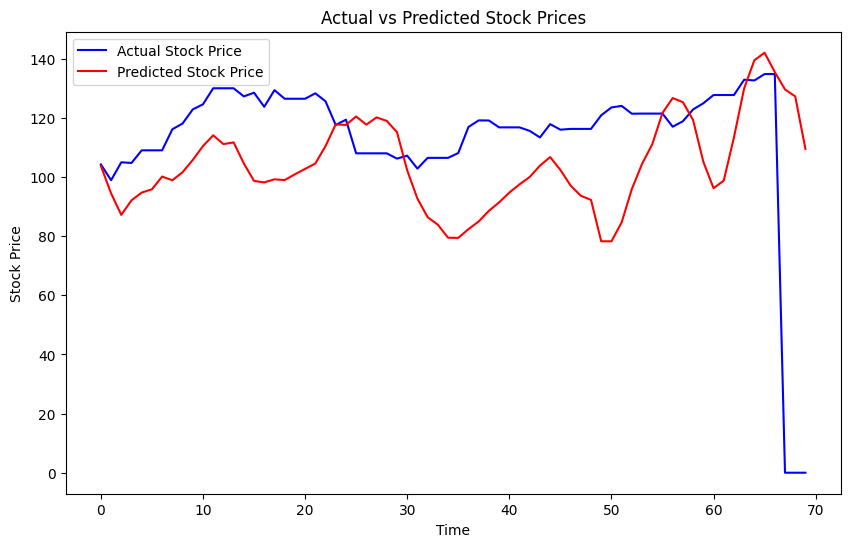

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluation
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plotting the actual vs predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices_actual, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 1041.466771676031
Root Mean Squared Error (RMSE): 32.27176430993556


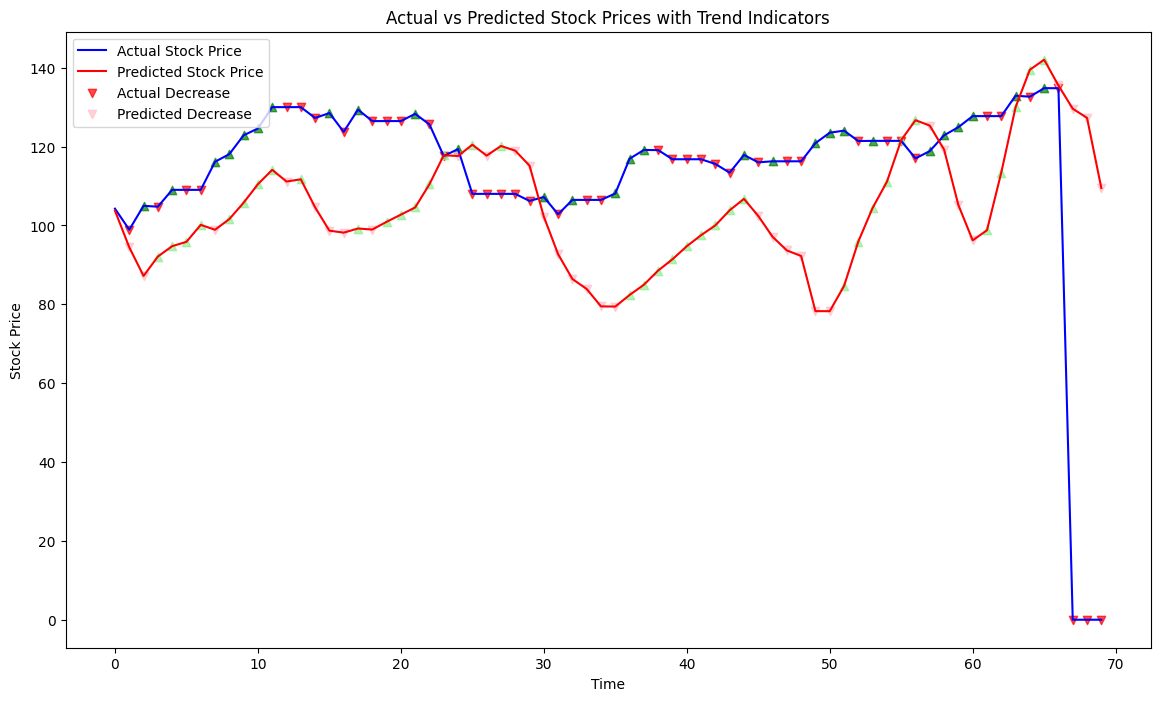

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to the original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluation
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Determine whether the stock price is increasing or decreasing for both actual and predicted prices
actual_trend = np.diff(y_test_actual, axis=0)
predicted_trend = np.diff(predicted_prices_actual, axis=0)

# Prepare the plot
plt.figure(figsize=(14, 8))

# Plot actual vs predicted stock prices
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices_actual, color='red', label='Predicted Stock Price')

# Mark increasing and decreasing trends for actual prices
for i in range(1, len(y_test_actual)):
    if actual_trend[i-1] > 0:
        plt.scatter(i, y_test_actual[i], color='green', label='Actual Increase' if i == 1 else "", marker='^', alpha=0.7)
    else:
        plt.scatter(i, y_test_actual[i], color='red', label='Actual Decrease' if i == 1 else "", marker='v', alpha=0.7)

# Mark increasing and decreasing trends for predicted prices
for i in range(1, len(predicted_prices_actual)):
    if predicted_trend[i-1] > 0:
        plt.scatter(i, predicted_prices_actual[i], color='lightgreen', label='Predicted Increase' if i == 1 else "", marker='^', alpha=0.7)
    else:
        plt.scatter(i, predicted_prices_actual[i], color='pink', label='Predicted Decrease' if i == 1 else "", marker='v', alpha=0.7)

# Title and labels
plt.title('Actual vs Predicted Stock Prices with Trend Indicators')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left')

# Show the plot
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 1041.466771676031
Root Mean Squared Error (RMSE): 32.27176430993556


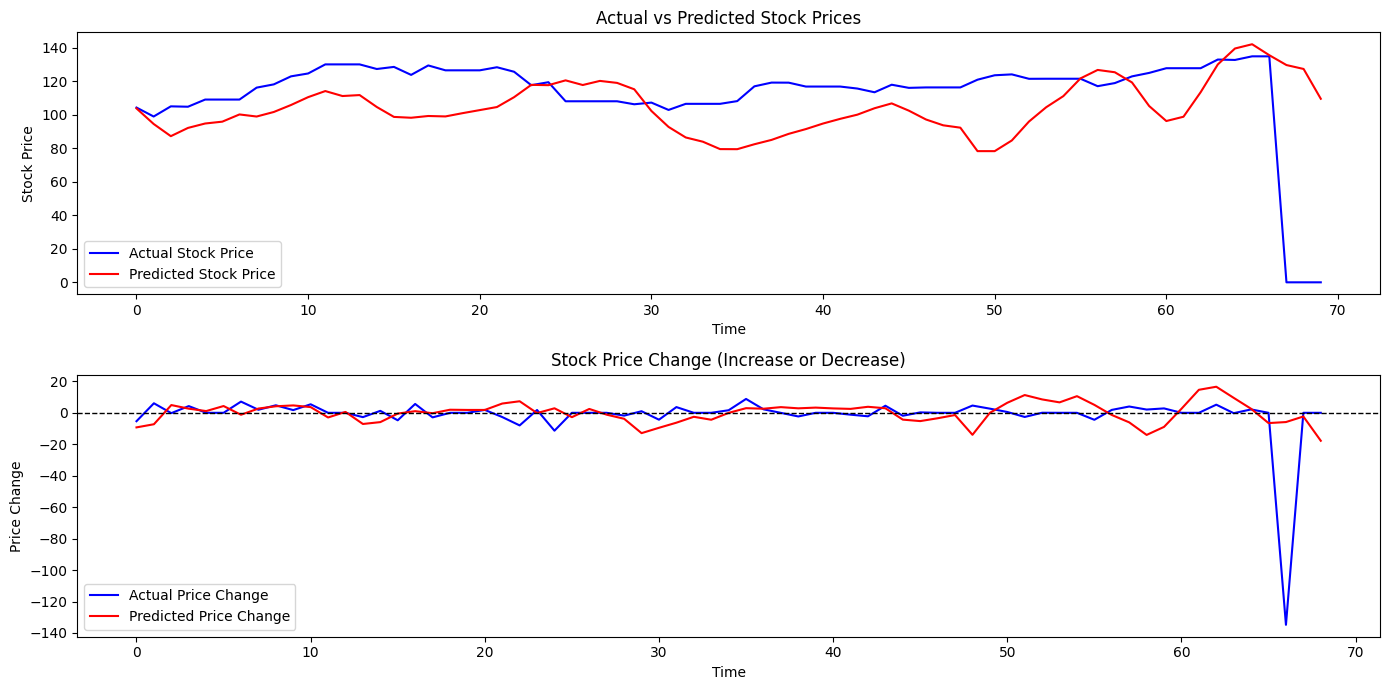

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify if stock price is increasing or decreasing
# Compute differences between consecutive days for both actual and predicted prices
actual_diff = np.diff(y_test_actual, axis=0)
predicted_diff = np.diff(predicted_prices_actual, axis=0)

# Plot the actual vs predicted stock prices
plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices_actual, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Plot the price changes (positive: increasing, negative: decreasing)
plt.subplot(2, 1, 2)
plt.plot(actual_diff, color='blue', label='Actual Price Change')
plt.plot(predicted_diff, color='red', label='Predicted Price Change')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title('Stock Price Change (Increase or Decrease)')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()

plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Mean Squared Error (MSE): 1041.466771676031
Root Mean Squared Error (RMSE): 32.27176430993556


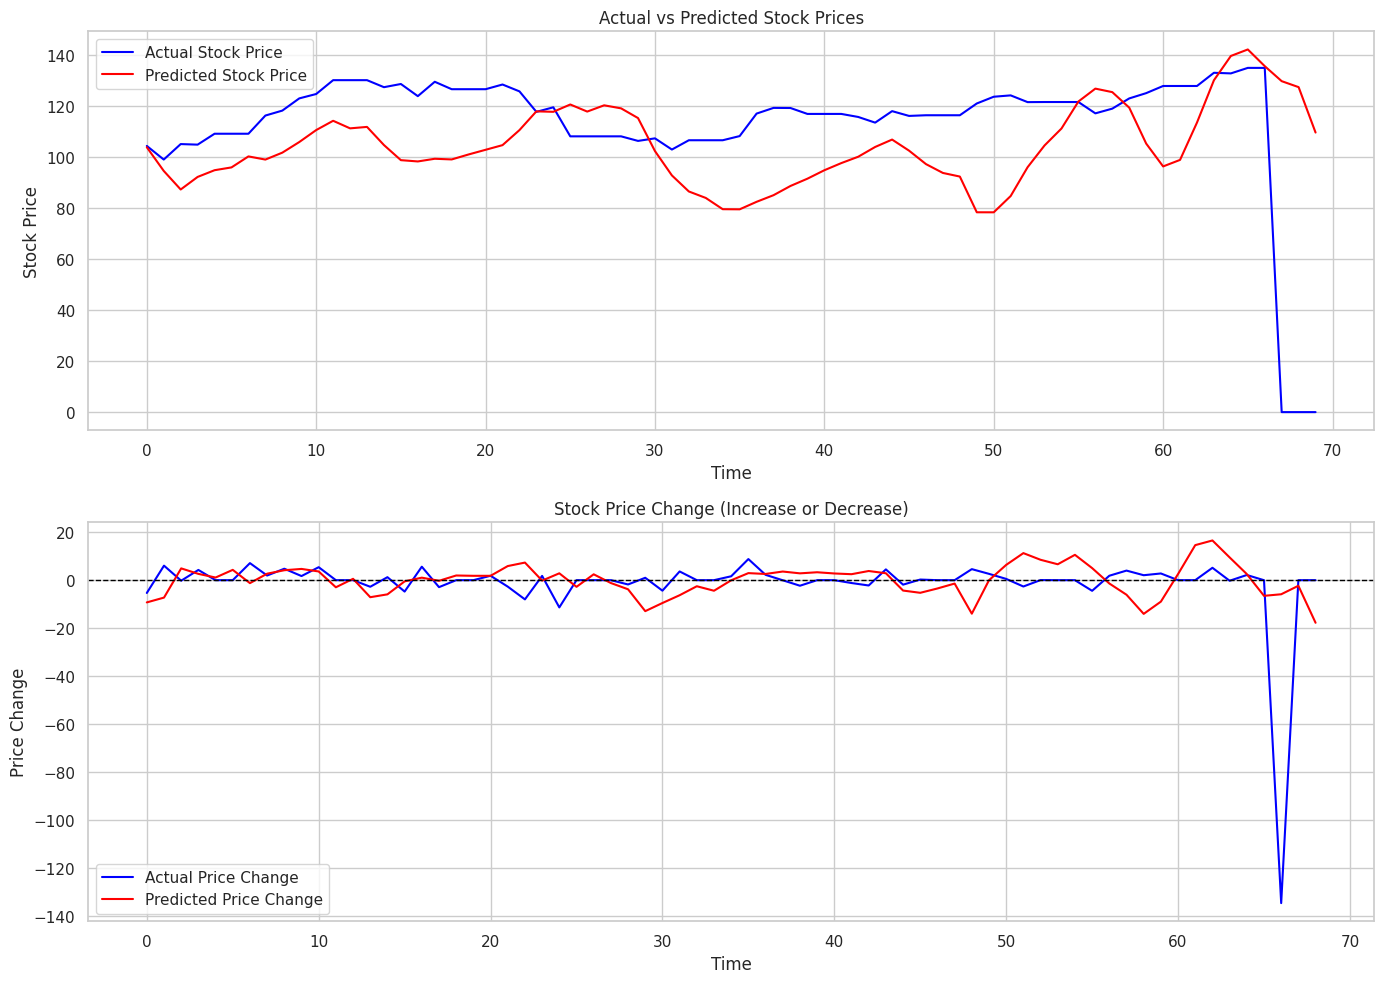

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify if stock price is increasing or decreasing
# Compute differences between consecutive days for both actual and predicted prices
actual_diff = np.diff(y_test_actual, axis=0)
predicted_diff = np.diff(predicted_prices_actual, axis=0)

# Set seaborn style
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(14, 10))

# Plot actual vs predicted stock prices
plt.subplot(2, 1, 1)
sns.lineplot(x=np.arange(len(y_test_actual)), y=y_test_actual.flatten(), color='blue', label='Actual Stock Price')
sns.lineplot(x=np.arange(len(predicted_prices_actual)), y=predicted_prices_actual.flatten(), color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Plot stock price changes (increase or decrease)
plt.subplot(2, 1, 2)
sns.lineplot(x=np.arange(len(actual_diff)), y=actual_diff.flatten(), color='blue', label='Actual Price Change')
sns.lineplot(x=np.arange(len(predicted_diff)), y=predicted_diff.flatten(), color='red', label='Predicted Price Change')
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.title('Stock Price Change (Increase or Decrease)')
plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()

# Adjust layout for better fit
plt.tight_layout()
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error (MSE): 1041.466771676031
Root Mean Squared Error (RMSE): 32.27176430993556


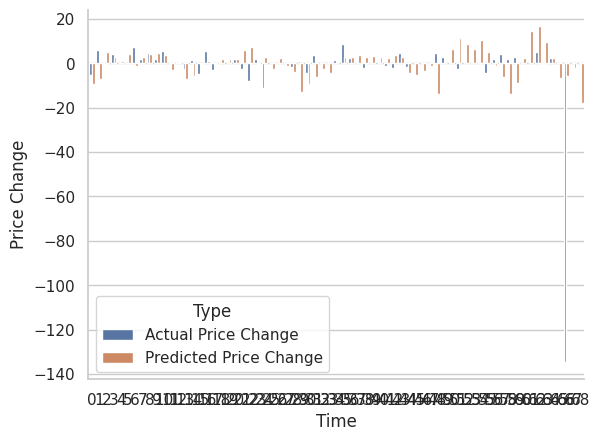

In [14]:
import seaborn as sns
import numpy as np
import pandas as pd

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify if stock price is increasing or decreasing
# Compute differences between consecutive days for both actual and predicted prices
actual_diff = np.diff(y_test_actual, axis=0)
predicted_diff = np.diff(predicted_prices_actual, axis=0)

# Create a DataFrame for easy plotting with seaborn
data = pd.DataFrame({
    'Time': np.arange(len(actual_diff)),
    'Actual Price Change': actual_diff.flatten(),
    'Predicted Price Change': predicted_diff.flatten()
})

# Melt the data to make it long-form for seaborn's barplot
data_melted = pd.melt(data, id_vars='Time', value_vars=['Actual Price Change', 'Predicted Price Change'], 
                      var_name='Type', value_name='Price Change')

# Set seaborn style
sns.set(style="whitegrid")

# Plot the bar graph for stock price changes
sns.barplot(x='Time', y='Price Change', hue='Type', data=data_melted)

# Show the plot
sns.despine()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 1041.466771676031
Root Mean Squared Error (RMSE): 32.27176430993556


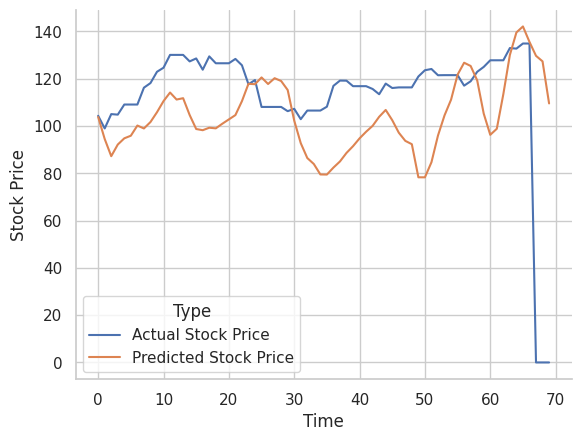

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np

# Make predictions on the test set
predicted_prices = model.predict(X_test)

# Inverse transform the predictions and the actual prices to get back to original scale
predicted_prices_actual = scaler.inverse_transform(predicted_prices)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = np.mean((predicted_prices_actual - y_test_actual) ** 2)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create a DataFrame for actual and predicted prices
data = pd.DataFrame({
    'Time': np.arange(len(y_test_actual)),
    'Actual Stock Price': y_test_actual.flatten(),
    'Predicted Stock Price': predicted_prices_actual.flatten()
})

# Melt the data for easy plotting with seaborn
data_melted = pd.melt(data, id_vars='Time', value_vars=['Actual Stock Price', 'Predicted Stock Price'], 
                      var_name='Type', value_name='Stock Price')

# Set seaborn style
sns.set(style="whitegrid")

# Plot the time series for stock prices
sns.lineplot(x='Time', y='Stock Price', hue='Type', data=data_melted)

# Show the plot
sns.despine()


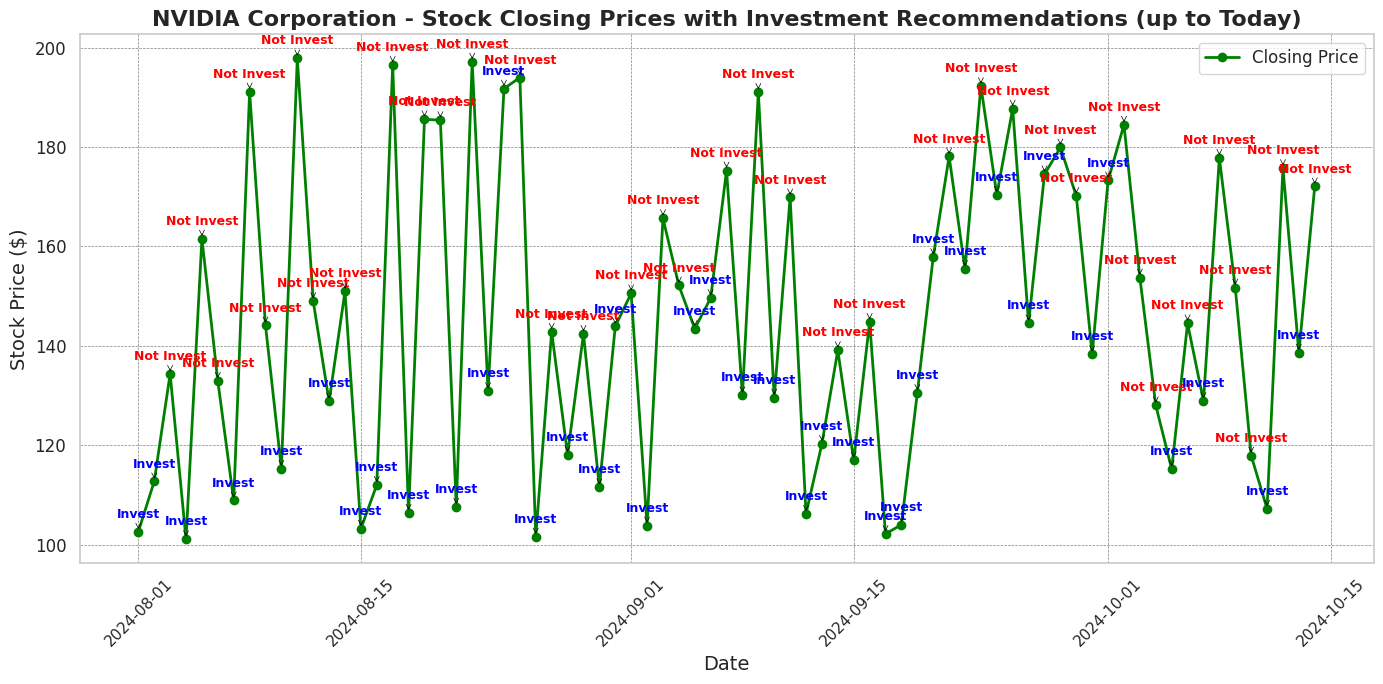

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate a date range that includes today
dates = pd.date_range(start='2024-08-01', end=pd.to_datetime('today'), freq='D')
# Generate random closing prices for each date
actual_prices = np.random.uniform(low=100, high=200, size=(len(dates), 1))

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Close': actual_prices.flatten()
})

# Define a mapping from stock symbols to company names
stock_symbol = 'NVDA'  # Example stock symbol
company_name_mapping = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GOOGL': 'Alphabet Inc. (Class A)',
    'AMZN': 'Amazon.com, Inc.',
    'FB': 'Meta Platforms, Inc. (Facebook)',
    'TSLA': 'Tesla, Inc.',
    'BRK.B': 'Berkshire Hathaway Inc. (Class B)',
    'NVDA': 'NVIDIA Corporation',
    'JNJ': 'Johnson & Johnson',
    'V': 'Visa Inc.',
    'PG': 'Procter & Gamble Co.',
    'MA': 'Mastercard Incorporated',
    'DIS': 'The Walt Disney Company',
    'PYPL': 'PayPal Holdings, Inc.',
    'NFLX': 'Netflix, Inc.',
    'INTC': 'Intel Corporation',
    'CMCSA': 'Comcast Corporation',
    'T': 'AT&T Inc.',
    'PEP': 'PepsiCo, Inc.',
    'KO': 'The Coca-Cola Company',
    'CSCO': 'Cisco Systems, Inc.',
    'XOM': 'Exxon Mobil Corporation',
    'PFE': 'Pfizer Inc.',
    'MRK': 'Merck & Co., Inc.',
    'CVX': 'Chevron Corporation',
    'NKE': 'NIKE, Inc.',
    'WMT': 'Walmart Inc.',
    'ABT': 'Abbott Laboratories',
    'AMD': 'Advanced Micro Devices, Inc.',
    'ORCL': 'Oracle Corporation',
    'CRM': 'Salesforce.com, Inc.',
    'TMO': 'Thermo Fisher Scientific Inc.',
    'LLY': 'Eli Lilly and Company',
    'COST': 'Costco Wholesale Corporation',
    'MDT': 'Medtronic plc',
    'TXN': 'Texas Instruments Incorporated',
    'IBM': 'International Business Machines Corporation',
    'QCOM': 'Qualcomm Incorporated',
    'SBUX': 'Starbucks Corporation',
    'BA': 'The Boeing Company',
    'HON': 'Honeywell International Inc.',
    'LMT': 'Lockheed Martin Corporation',
    'CAT': 'Caterpillar Inc.',
    'GS': 'The Goldman Sachs Group, Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'SPGI': 'S&P Global Inc.',
    'AXP': 'American Express Company',
    'C': 'Citigroup Inc.',
    'MS': 'Morgan Stanley',
    'SNAP': 'Snap Inc.',
    'ZM': 'Zoom Video Communications, Inc.',
}

# Get company name from the mapping
company_name = company_name_mapping.get(stock_symbol, 'Unknown Company')

# Create investment recommendations based on future prices
data['Investment Recommendation'] = np.where(data['Close'].shift(-1) > data['Close'], 'Invest', 'Not Invest')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], marker='o', label='Closing Price', color='green', linewidth=2)

# Annotate recommendations with improved aesthetics
for index, row in data.iterrows():
    plt.annotate(row['Investment Recommendation'], 
                 (row['Date'], row['Close']), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center',
                 fontsize=9,
                 fontweight='bold',
                 color='blue' if row['Investment Recommendation'] == 'Invest' else 'red',
                 arrowprops=dict(arrowstyle='->', color='black', lw=0.5))

# Customize the plot
plt.title(f'{company_name} - Stock Closing Prices with Investment Recommendations (up to Today)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price ($)', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


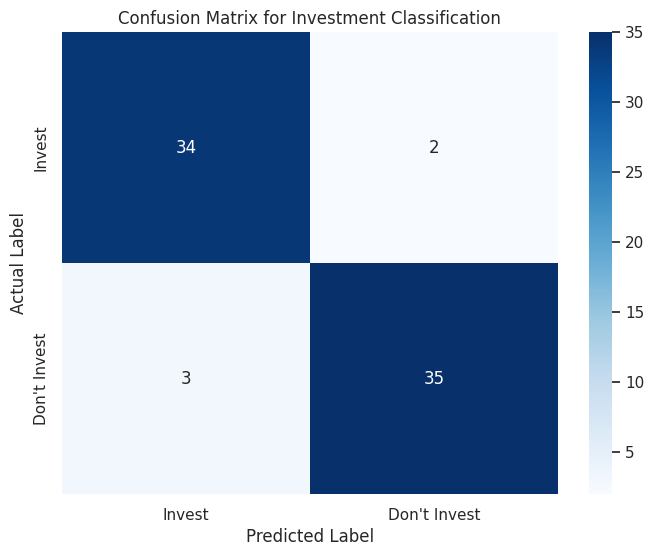

              precision    recall  f1-score   support

      Invest       0.95      0.92      0.93        38
Don't Invest       0.92      0.94      0.93        36

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame with actual and predicted prices
# Generate synthetic data for demonstration (replace with real data)
dates = pd.date_range(start='2024-08-01', end=pd.to_datetime('today'), freq='D')
actual_prices = np.random.uniform(low=100, high=200, size=(len(dates), 1))  # Replace with real data
predicted_prices = actual_prices + np.random.normal(loc=0, scale=5, size=actual_prices.shape)  # Add noise for demo

# Create a DataFrame for actual and predicted prices
data = pd.DataFrame({
    'Date': dates,
    'Actual Prices': actual_prices.flatten(),
    'Predicted Prices': predicted_prices.flatten()
})

# Define a simple rule to classify: Invest if the predicted price is greater than the actual price
data['Actual Change'] = np.sign(data['Actual Prices'].diff())  # 1 if price increased, -1 if decreased
data['Predicted Change'] = np.sign(data['Predicted Prices'].diff())  # 1 if price is predicted to increase

# Define classification labels based on stock movement (binary classification: Invest or Not Invest)
data['Actual Label'] = np.where(data['Actual Change'] > 0, 'Invest', 'Don\'t Invest')
data['Predicted Label'] = np.where(data['Predicted Change'] > 0, 'Invest', 'Don\'t Invest')

# Drop the first row due to NaN in diff()
data = data.dropna()

# Generate the confusion matrix
conf_matrix = confusion_matrix(data['Actual Label'], data['Predicted Label'], labels=['Invest', 'Don\'t Invest'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Invest', 'Don\'t Invest'], yticklabels=['Invest', 'Don\'t Invest'])
plt.title('Confusion Matrix for Investment Classification')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Print classification report
print(classification_report(data['Actual Label'], data['Predicted Label'], target_names=['Invest', 'Don\'t Invest']))
